# Análisis en componentes principales y automatización de tareas

En esta libreta vamos a ver como se define un proceso completo de clasificación (incluyendo varios pasos) y lo vamos a utilizar para ejemplificar el uso del análisis en componentes principales

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# El clasificador a usar
from sklearn import linear_model

# El método de PCA
from sklearn import decomposition 

# El conjunto de datos de ejemplo
from sklearn import datasets

# Para hacer varios pasos en secuencia
from sklearn.pipeline import Pipeline

# Para encontrar el mejor valor de un parámetro
from sklearn.grid_search import GridSearchCV

%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')


## 1. Define el pipeline

In [4]:
# El tratamiento de los datos por PCA
pca = decomposition.PCA()

# El clasificador, por regresión logística
logistic = linear_model.LogisticRegression()

# Siempre que se haga entrenamiento o predicción, hay que
# aplicar pca primero y logistic después

pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Ahora, este pipeline, le vamos a agregar que cuando se entrene,
# pueda variar los valores de el número de componentes principales
# del PCA y el valor del factor de regularización de la regresión 
# logística

# Escoge los valores en que se van a probar ambos parámetros
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

# Aplica la optimización de parámetros
estimator = GridSearchCV(pipe,
                         dict(pca__n_components= n_components,
                              logistic__C= Cs))


## 2. Encuentra los mejores parámetros para PCA y regresión logística

In [6]:
# Carga los datos
digits = datasets.load_digits()
X, y = digits.data, digits.target

estimator.fit(X, y)

print "El mejor valor de regularización es: ", estimator.best_estimator_.named_steps['logistic'].C
print "El número óptimo de componentes principales es: ", estimator.best_estimator_.named_steps['pca'].n_components

El mejor valor de regularización es:  1.0
El número óptimo de componentes principales es:  40


## 3. Muestra la varianza explicada por cada componente principal

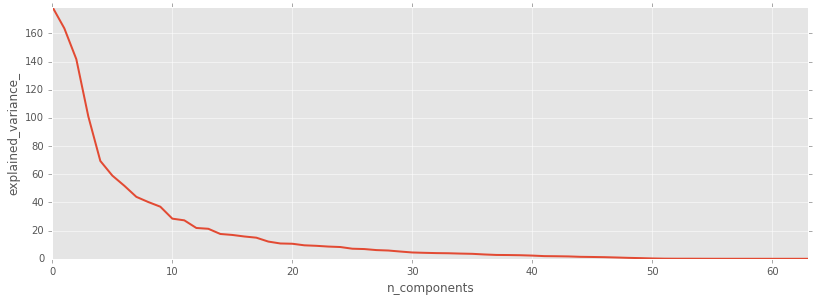

In [11]:
pca.fit(X)

plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')